In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

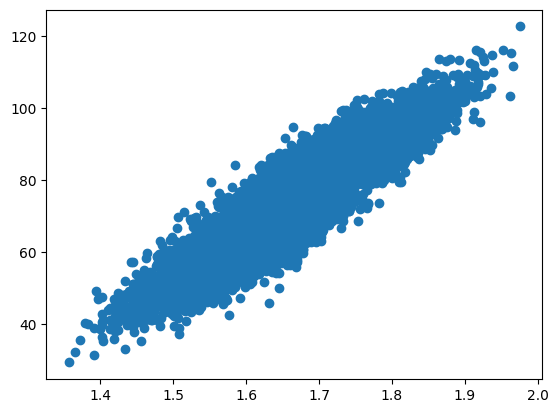

In [3]:
# plot the data
plt.scatter(height, weight)
plt.show()


In [4]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [5]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - tx @ w
    return np.linalg.norm(e) ** 2 / (2 * len(e))

Loss: np.linalg.norm(e) ** 2 / len(e) - e must be squared!
More elegantly: Loss = (e ** 2).mean() / 2

# 2. Grid Search

Fill in the function `grid_search()` below:

In [6]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            losses[i, j] = compute_loss(y, tx, [w0, w1])
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.793541019523108, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.028 seconds


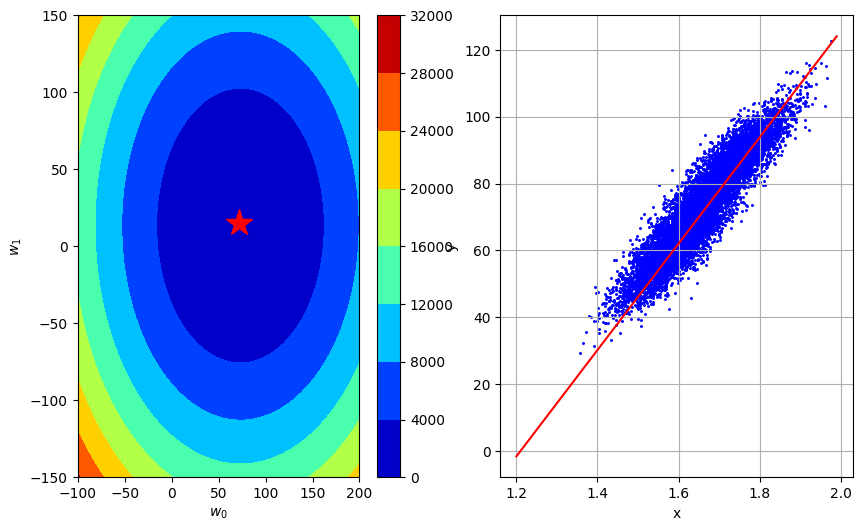

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    N = len(y)
    e = y - tx @ w
    return -1/N * tx.T @ e

In [9]:
g1 = compute_gradient(y, tx, np.array([100, 20]))
g2 = compute_gradient(y, tx, np.array([50, 10]))
print(g1, np.linalg.norm(g1))
print(g2, np.linalg.norm(g2))

[26.706078    6.52028757] 27.49052112929263
[-23.293922    -3.47971243] 23.55239267824769


Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters + 1 containing the model parameters as numpy arrays of shape (2, ),
            for each iteration of GD (as well as the final weights)
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************

        g = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)

        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        
        w = w - gamma * g

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.2367127591674, w0=51.3057454014737, w1=9.435798704492473
GD iter. 1/49: loss=265.3024621089567, w0=66.6974690219157, w1=12.266538315840135
GD iter. 2/49: loss=37.87837955044083, w0=71.3149861080483, w1=13.115760199244388
GD iter. 3/49: loss=17.410212120174414, w0=72.70024123388808, w1=13.370526764265657
GD iter. 4/49: loss=15.568077051450446, w0=73.11581777164001, w1=13.446956733772032
GD iter. 5/49: loss=15.402284895265295, w0=73.2404907329656, w1=13.469885724623945
GD iter. 6/49: loss=15.387363601208632, w0=73.27789262136326, w1=13.476764421879517
GD iter. 7/49: loss=15.38602068474353, w0=73.28911318788256, w1=13.478828031056189
GD iter. 8/49: loss=15.385899822261667, w0=73.29247935783836, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638305, w0=73.2934892088251, w1=13.47963283863509
GD iter. 10/49: loss=15.385887965652199, w0=73.29379216412111, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305070992, w1=13.479705271317192
G

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [13]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    B_n = len(y)
    e = y - tx @ w
    return -1/B_n * tx.T @ e


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************

        # num_batches = 1 means I only consider one batch (subset) of size batch_size
        for batch_y, batch_tx in batch_iter(y, tx, batch_size, num_batches=1):
            loss = compute_loss(batch_y, batch_tx, w)
            g = compute_stoch_gradient(batch_y, batch_tx, w)
            w = w - gamma * g
            ws.append(w)
            losses.append(loss)
        
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [14]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=1204.785128784525, w0=4.908737370820576, w1=-13.559822989728534
SGD iter. 1/49: loss=963.8315778228589, w0=9.29925346308777, w1=-16.145536209760813
SGD iter. 2/49: loss=2366.082021502585, w0=16.17832610626081, w1=-13.72583049186009
SGD iter. 3/49: loss=4669.763591608172, w0=25.842449027259043, w1=-2.780983849335742
SGD iter. 4/49: loss=2972.0343581480606, w0=33.552227698723044, w1=9.002480525620301
SGD iter. 5/49: loss=1140.6890788654036, w0=38.328605152118875, w1=11.496938504853972
SGD iter. 6/49: loss=943.4167802462126, w0=42.67237489796456, w1=11.013811277015222
SGD iter. 7/49: loss=987.3628742272766, w0=47.11616353881434, w1=14.066162689726678
SGD iter. 8/49: loss=609.6546564488823, w0=50.608024522441504, w1=16.867658478950887
SGD iter. 9/49: loss=162.11248619975797, w0=52.408649337330814, w1=15.1220982819425
SGD iter. 10/49: loss=369.2993702044565, w0=55.12636665230107, w1=16.78421107038647
SGD iter. 11/49: loss=211.26420076840878, w0=57.18191621759211, w1=14.

In [15]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

As we can see SGD required more steps to reach convergence however the steps were much faster and total running time is also faster.

# 5. Effect of Outliers and MAE Cost Function

In [16]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************

height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

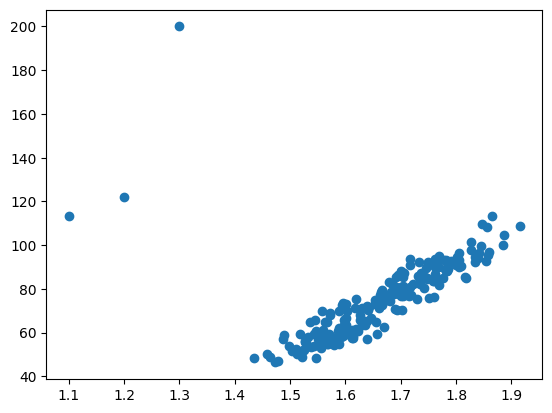

In [17]:
# plot the data
plt.scatter(height, weight)
plt.show()


In [18]:
y.shape, tx.shape

((203,), (203, 2))

In [19]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************

# fit the model
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)



end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2954.2201632327196, w0=52.281713043776286, w1=6.218937008381971
GD iter. 1/49: loss=380.1712309485858, w0=67.96622695690918, w1=8.084618110896507
GD iter. 2/49: loss=148.50682704301363, w0=72.67158113084905, w1=8.644322441650846
GD iter. 3/49: loss=127.6570306915122, w0=74.083187383031, w1=8.812233740877144
GD iter. 4/49: loss=125.78054901987703, w0=74.50666925868559, w1=8.862607130645031
GD iter. 5/49: loss=125.61166566942987, w0=74.63371382138197, w1=8.877719147575396
GD iter. 6/49: loss=125.59646616788963, w0=74.67182719019088, w1=8.882252752654505
GD iter. 7/49: loss=125.59509821275101, w0=74.68326120083356, w1=8.88361283417824
GD iter. 8/49: loss=125.59497509678854, w0=74.68669140402636, w1=8.88402085863536
GD iter. 9/49: loss=125.59496401635192, w0=74.68772046498421, w1=8.884143265972495
GD iter. 10/49: loss=125.59496301911258, w0=74.68802918327155, w1=8.884179988173635
GD iter. 11/49: loss=125.59496292936106, w0=74.68812179875776, w1=8.88419100483398
GD iter.

In [20]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [21]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    
    # compute the subgradient
    e = y - tx @ w
    return -1/len(y) * tx.T @ np.sign(e)


In [22]:
print(np.sign(-10))
print(np.sign(0))
print(np.sign(10))

-1
0
1


Subgradient of MAE in point 0 has one of the possible values 0 -> we can use sign everywhere

Subgradient of f(x) = |x| is sign(x)

In [23]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        
        g = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w)

        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        w = w - gamma * g

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [24]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=2954.2201632327196, w0=0.6999999999999993, w1=1.1135189992295124e-15
SubGD iter. 1/499: loss=2902.1834501889443, w0=1.3999999999999986, w1=2.227037998459025e-15
SubGD iter. 2/499: loss=2850.636737145169, w0=2.099999999999998, w1=3.340556997688537e-15
SubGD iter. 3/499: loss=2799.5800241013917, w0=2.799999999999997, w1=4.45407599691805e-15
SubGD iter. 4/499: loss=2749.0133110576153, w0=3.4999999999999964, w1=5.567594996147562e-15
SubGD iter. 5/499: loss=2698.9365980138386, w0=4.199999999999996, w1=6.681113995377075e-15
SubGD iter. 6/499: loss=2649.349884970063, w0=4.899999999999995, w1=7.794632994606588e-15
SubGD iter. 7/499: loss=2600.253171926286, w0=5.599999999999994, w1=8.9081519938361e-15
SubGD iter. 8/499: loss=2551.64645888251, w0=6.299999999999994, w1=1.0021670993065611e-14
SubGD iter. 9/499: loss=2503.5297458387345, w0=6.999999999999993, w1=1.1135189992295123e-14
SubGD iter. 10/499: loss=2455.9030327949577, w0=7.699999999999992, w1=1.2248708991524635e-14

In [25]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [26]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        for batch_y, batch_tx in batch_iter(y, tx, batch_size, num_batches=1):
            loss = compute_loss(batch_y, batch_tx, w)
            g = compute_subgradient_mae(batch_y, batch_tx, w)
            w = w - gamma * g
            ws.append(w)
            losses.append(loss)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [27]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=1446.407839559022, w0=0.7, w1=-0.9464174657633352
SubSGD iter. 1/499: loss=2273.1645178309154, w0=1.4, w1=-1.4498917429902005
SubSGD iter. 2/499: loss=1371.8588699027039, w0=2.0999999999999996, w1=-1.9861737941006423
SubSGD iter. 3/499: loss=1207.2548115007273, w0=2.8, w1=-2.585799828302663
SubSGD iter. 4/499: loss=3146.8934749156847, w0=3.5, w1=-2.2386374484720806
SubSGD iter. 5/499: loss=2309.4424831177794, w0=4.2, w1=-2.2218812823036127
SubSGD iter. 6/499: loss=1125.7816363812512, w0=4.9, w1=-2.9005796687156775
SubSGD iter. 7/499: loss=1165.3455475548992, w0=5.6000000000000005, w1=-3.490421165452126
SubSGD iter. 8/499: loss=2343.573062578415, w0=6.300000000000001, w1=-3.716027203048291
SubSGD iter. 9/499: loss=3741.5224819026876, w0=7.000000000000001, w1=-3.3646971620223334
SubSGD iter. 10/499: loss=1068.8961783274553, w0=7.700000000000001, w1=-3.894952409688382
SubSGD iter. 11/499: loss=3197.5422336916076, w0=8.4, w1=-3.443494176963614
SubSGD iter. 12/499: 

In [28]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>